The Sparks Foundation

Graduate Rotational Internship Program (GRIP) July2021 Batch

Data Science & Business Analytics 

Task - 2 From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually

Prediction using Unsupervised ML

Author - Rohan Amrutkar

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.cluster import KMeans

In [28]:
import seaborn as sn

Importing & reading dataset

In [15]:
iris = pd.read_csv("Iris.csv")

In [16]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Here we get sample of our data set which depicts 5 Rows and all columns.

In [17]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Using above command we get no null value present in given data set.

In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [20]:
iris.shape

(150, 6)

In [27]:
iris.Species.nunique()
iris.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

Data visualization

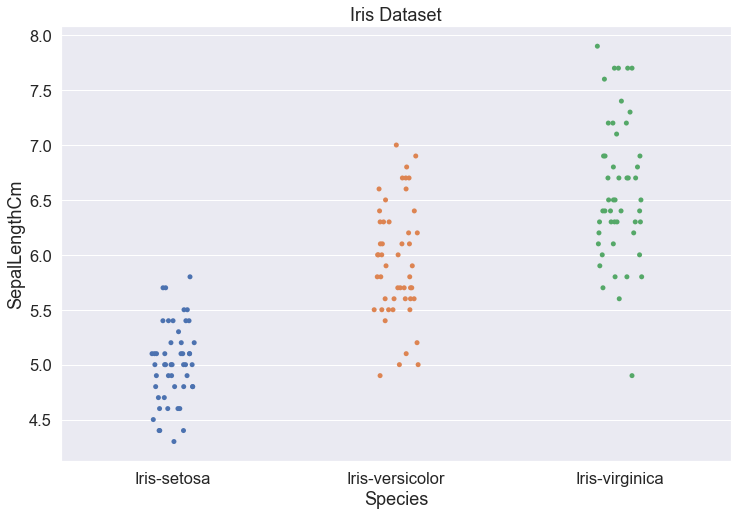

In [29]:
plt.figure(figsize=(12,8))
sn.set(font_scale=1.5)
sn.stripplot(x='Species',y='SepalLengthCm',data=iris)
plt.title('Iris Dataset')
plt.show()


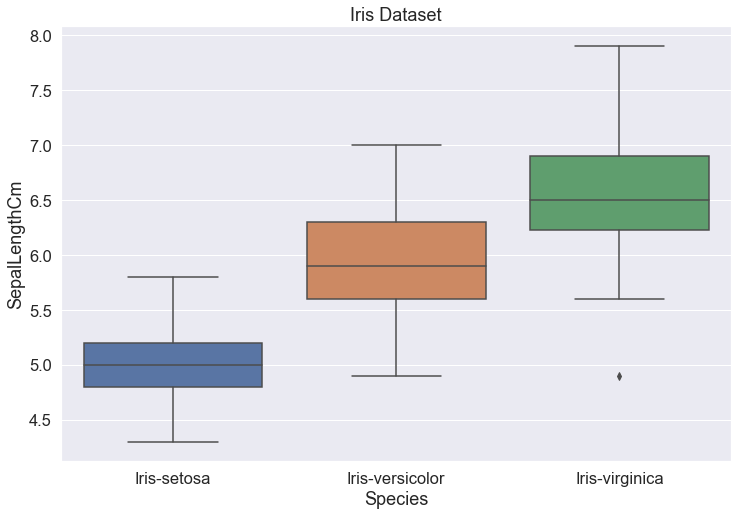

In [30]:
plt.figure(figsize=(12,8))
sn.set(font_scale=1.5)
sn.boxplot(x='Species',y='SepalLengthCm',data=iris)
plt.title('Iris Dataset')
plt.show()


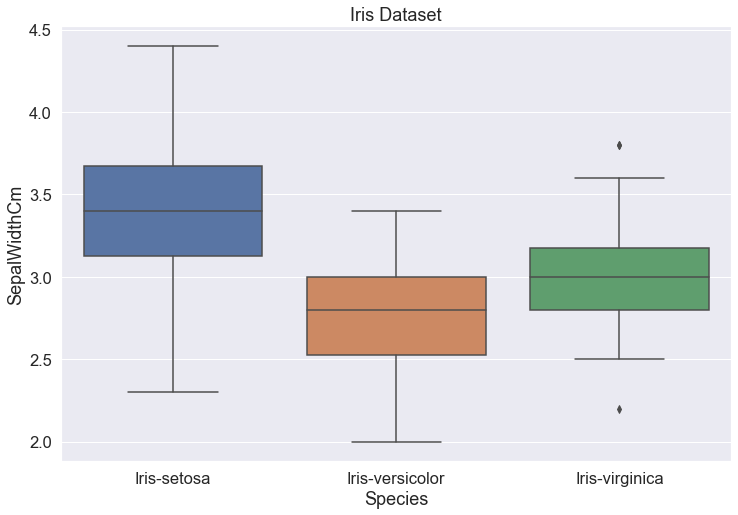

In [32]:
plt.figure(figsize=(12,8))
sn.set(font_scale=1.5)
sn.boxplot(x='Species',y='SepalWidthCm',data=iris)
plt.title('Iris Dataset')
plt.show()


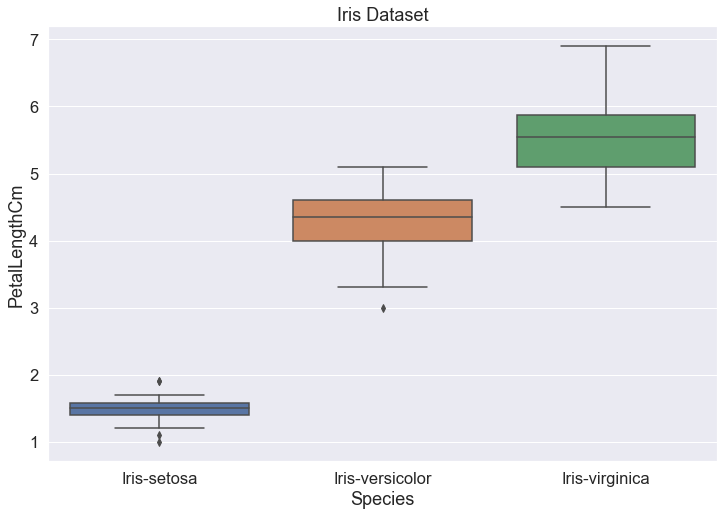

In [33]:
plt.figure(figsize=(12,8))
sn.set(font_scale=1.5)
sn.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.title('Iris Dataset')
plt.show()


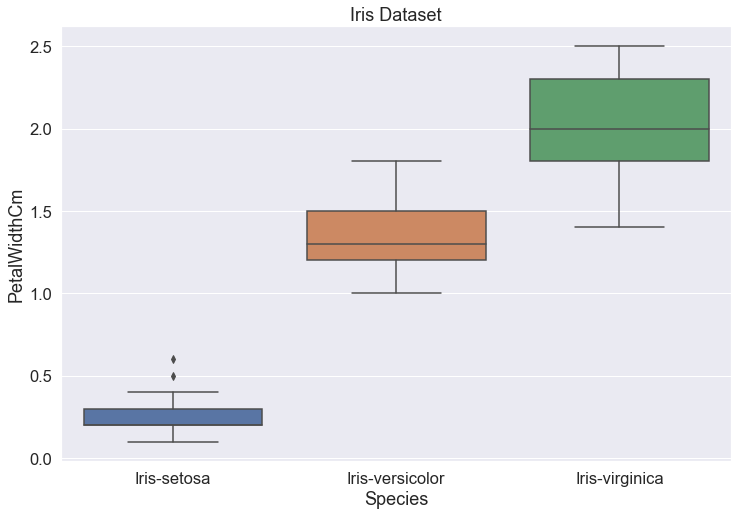

In [34]:
plt.figure(figsize=(12,8))
sn.set(font_scale=1.5)
sn.boxplot(x='Species',y='PetalWidthCm',data=iris)
plt.title('Iris Dataset')
plt.show()


Finding the optimum number of clusters using K - means clustering

In [21]:
x = iris.drop(['Id','Species'],axis = 1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
wcss


[281831.54466666654,
 70581.3808,
 31320.711199999994,
 17757.654893314375,
 11422.155508342603,
 7894.430137179489,
 5900.97241746659,
 4551.094070347439,
 3583.9534844771247,
 2954.1586785714294]

In [39]:
kmeans = KMeans(n_jobs= 1,n_clusters =3,init='k-means++')
kmeans.fit(iris.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

C:\Users\Mrunal\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


array([[ 75.5  ,   5.936,   2.77 ,   4.26 ],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464]])

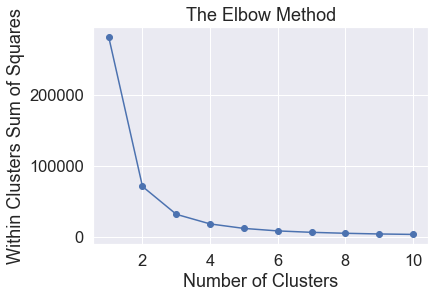

In [36]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
nu_clusters=range(1,11)
plt.plot(nu_clusters,wcss,'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares')
plt.show()


Above plot we can clearly see that the elbow is visible at 3rd cluster so we can say that there are three clusters are suitable for given data set.

Initializing K-Means With Optimum Number of Cluster 

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 11, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


Predicting Values 

In [25]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
iris['cluster']=y_kmeans
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0


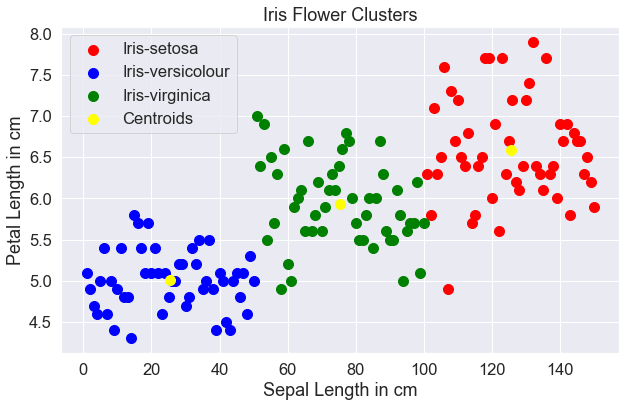

In [37]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.show()
